In [8]:
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(x_train.min())
print(x_train.max())


(60000, 28, 28)
(10000, 28, 28)
0
255


<Figure size 640x480 with 0 Axes>

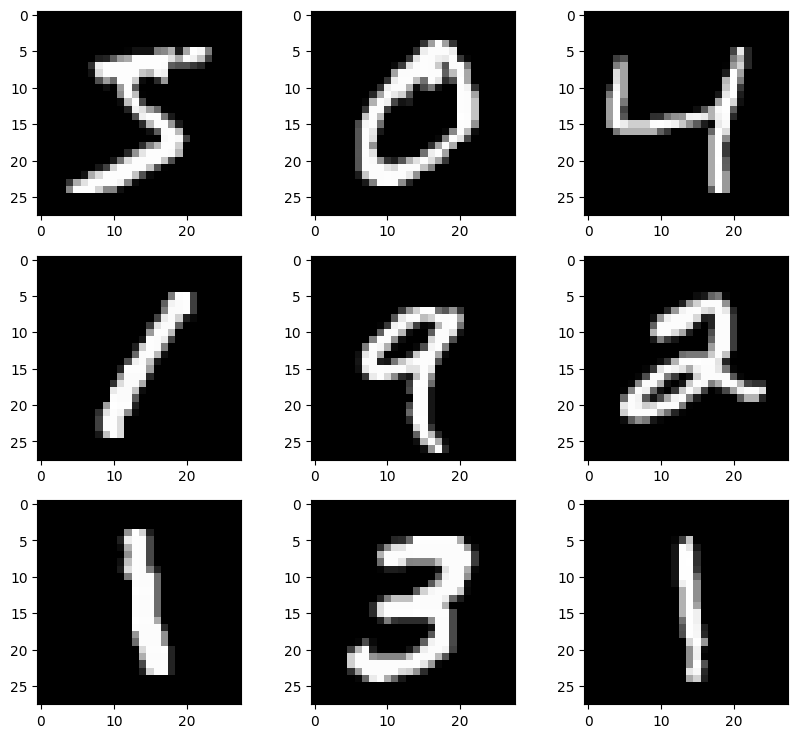

In [10]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])


In [11]:
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())


0.0
1.0


In [12]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
# Checking the shape
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [13]:
def retrieve_info(cluster_labels,y_train):
  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

total_clusters = len(np.unique(y_train))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)


MiniBatchKMeans(n_clusters=10)

In [14]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])


[8 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 1 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [15]:
# Calculating accuracy score
print(accuracy_score(number_labels,y_train))


0.5813333333333334


In [16]:
# Increase to 50 clusters, and fit the model
kmeans = MiniBatchKMeans(n_clusters = 50)
kmeans.fit(X_train)

# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
print('\n')


Accuracy score : 0.7954166666666667




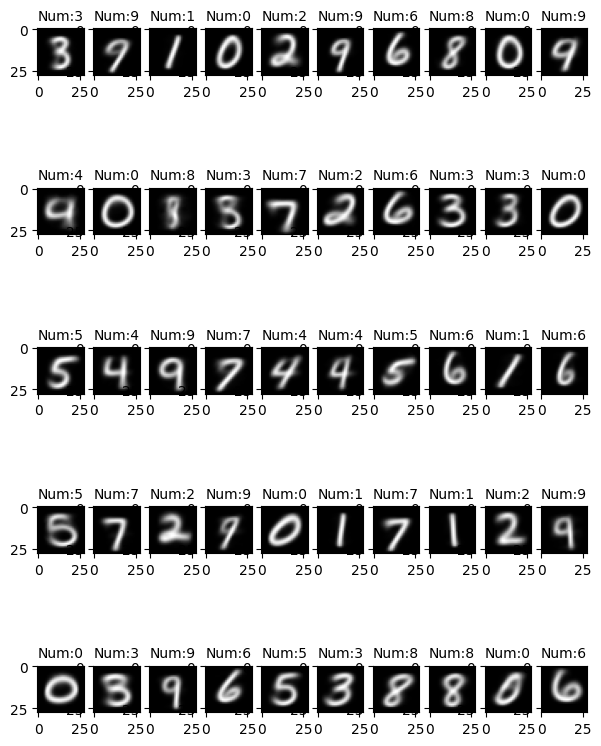

In [17]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_
centroids.shape
centroids = centroids.reshape(50,28,28)
centroids = centroids * 255
plt.figure(figsize = (10,10))
bottom = 0.35
for i in range(50):
 plt.subplots_adjust(bottom)
 plt.subplot(5,10,i+1)
 plt.title('Num:{}'.format(reference_labels[i]),fontsize = 10)
 plt.imshow(centroids[i])
